In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
c = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex",
     "capital_gain", "capital_loss", "hours_per_week", "native_country", "label"]
data1 = pd.read_csv("adult.test", names=c, index_col=False, sep=", ", engine="python", skiprows=1)
data2 = pd.read_csv("adult.data", names=c, index_col=False, sep=", ", engine="python")
# engine python to avoid ParserWarning since separator that are more than 1 characters are considered regex

In [3]:
data1["label"] = data1["label"].replace('<=50K.', '<=50K')
data1["label"] = data1["label"].replace('>50K.', '>50K')

In [55]:
data = pd.concat([data1, data2], ignore_index=True)
# You can find the dataset with missing values in the below file
# The file data_with_missing_values.csv can be load and run from this point onward
# data.to_csv("data_with_missing_values.csv", index=False)
data.drop_duplicates(inplace=True)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Removing rows that has "?" since the dataset is large.
# The absence of these records contribute to only 7%, considered to be insignificant towards data modelling.
for c in data.columns:
    num_ques = data[c].isin(["?"]).sum()
    if num_ques > 0:
        print(c, num_ques, num_ques/data.shape[0])
        data = data[data[c] != "?"]
data.shape

workclass 2795 0.057286329165812666
occupation 10 0.0002174149364061311
native_country 810 0.017614439491138414


(45175, 15)

In [6]:
# You can find the dataset that was cleaned in the below file
# The file data.csv can be load and run from this point onward
# data.to_csv("data.csv", index=False)

In [7]:
data.describe(include=["object"]).T

,count,unique,top,freq
workclass,45175,7,Private,33262
education,45175,16,HS-grad,14770
marital_status,45175,7,Married-civ-spouse,21042
occupation,45175,14,Craft-repair,6010
relationship,45175,6,Husband,18653
race,45175,5,White,38859
sex,45175,2,Male,30495
native_country,45175,41,United-States,41256
label,45175,2,<=50K,33973


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45175.0,38.556170,13.215349,17.0,28.0,37.0,47.0,90.0
fnlwgt,45175.0,189738.798450,105652.436515,13492.0,117392.5,178312.0,237903.0,1490400.0
education_num,45175.0,10.119314,2.551740,1.0,9.0,10.0,13.0,16.0
capital_gain,45175.0,1102.576270,7510.249876,0.0,0.0,0.0,0.0,99999.0
capital_loss,45175.0,88.687593,405.156611,0.0,0.0,0.0,0.0,4356.0
hours_per_week,45175.0,40.942512,12.007730,1.0,40.0,40.0,45.0,99.0


---

In [9]:
# Creating new column age_level
cond = [(data.age > 0) & (data.age <= 25), 
        (data.age > 25) & (data.age <= 45),
        (data.age > 45) & (data.age <= 65),
        (data.age > 65)
]
values = ["Young", "Middle-aged", "Senior", "Old"]
data["age_level"] = np.select(cond, values)
data.age_level.value_counts()

age_level
Middle-aged    23530
Senior         11886
Young           8416
Old             1343
Name: count, dtype: int64

In [10]:
# Creating new column hours_work_level
cond = [(data.hours_per_week > 0) & (data.hours_per_week <= 25), 
        (data.hours_per_week > 25) & (data.hours_per_week <= 40),
        (data.hours_per_week > 40) & (data.hours_per_week <= 60),
        (data.hours_per_week > 60)
]
values = ["Part-time", "Full-time", "Over-time", "Too-much"]
data["hours_work_level"] = np.select(cond, values)
data.hours_work_level.value_counts()

hours_work_level
Full-time    26557
Over-time    12180
Part-time     4849
Too-much      1589
Name: count, dtype: int64

In [11]:
# Creating new column capital_gain_level
cond = [(data.capital_gain == 0), 
        (data.capital_gain > 0) & (data.capital_gain <= np.percentile(data[data.capital_gain != 0].capital_gain, 25)),
        (data.capital_gain > np.percentile(data[data.capital_gain != 0].capital_gain, 25)) & (data.capital_gain <= data[data.capital_gain != 0].capital_gain.median()),
        (data.capital_gain > data[data.capital_gain != 0].capital_gain.median()) & (data.capital_gain <= np.percentile(data[data.capital_gain != 0].capital_gain, 75)),
        (data.capital_gain > np.percentile(data[data.capital_gain != 0].capital_gain, 75)) & (data.capital_gain <= data.capital_gain.max())
]
values = ["None", "Low", "Medium-Low", "Medium-High", "High"]
data["capital_gain_level"] = np.select(cond, values)
data.capital_gain_level.value_counts().to_frame()

,count
capital_gain_level,
None,41385
Medium-Low,1210
Low,971
High,907
Medium-High,702


In [12]:
# Creating new column capital_gain_loss
cond = [(data.capital_loss == 0), 
        (data.capital_loss > 0) & (data.capital_loss <= np.percentile(data[data.capital_loss != 0].capital_loss, 25)),
        (data.capital_loss > np.percentile(data[data.capital_loss != 0].capital_loss, 25)) & (data.capital_loss <= data[data.capital_loss != 0].capital_loss.median()),
        (data.capital_loss > data[data.capital_loss != 0].capital_loss.median()) & (data.capital_loss <= np.percentile(data[data.capital_loss != 0].capital_loss, 75)),
        (data.capital_loss > np.percentile(data[data.capital_loss != 0].capital_loss, 75)) & (data.capital_loss <= data.capital_loss.max())
]
values = ["None", "Low", "Medium-Low", "Medium-High", "High"]
data["capital_loss_level"] = np.select(cond, values)
data.capital_loss_level.value_counts().to_frame()

,count
capital_loss_level,
None,43035
Medium-High,571
Medium-Low,547
Low,536
High,486


In [13]:
# Creating new column marry
cond = [data.marital_status.isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']),
data.marital_status.isin(['Never-married', 'Widowed', 'Separated', 'Divorced'])
]
values = ["Married", "Not-married"]
data["marry"] = np.select(cond, values)
data.groupby(["marry"])["marital_status"].value_counts().reset_index()

,marry,marital_status,count
0,Married,Married-civ-spouse,21042
1,Married,Married-spouse-absent,552
2,Married,Married-AF-spouse,32
3,Not-married,Never-married,14567
4,Not-married,Divorced,6294
5,Not-married,Separated,1411
6,Not-married,Widowed,1277


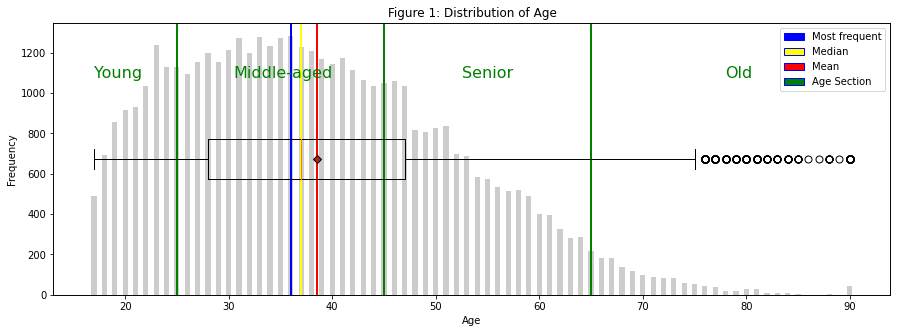

In [14]:
age_count_all = data.age.value_counts().reset_index()
age_count_all.rename(columns={"age":"Age", "count":"Count"}, inplace=True)

fig, ax = plt.subplots()
# Drawing the bar chart
ax.bar(age_count_all["Age"], age_count_all["Count"], width=0.5, color=(0, 0, 0, 0.2))
# Drawing the box plot above the chart. Using ax.twinx means the two share the same x axis.
ax2 = ax.twinx()
ax2.boxplot(data.age, vert=False, showmeans=True,
            meanprops={"marker":'D', "markeredgecolor":'black', "markerfacecolor":"firebrick"},
            flierprops={"marker":'o', "markersize":7, "linestyle":'none'}
)
ax.set_title("Figure 1: Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

# Hide the second y axis as it is not needed
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

# Drawing central tendency measures
ax.axvline(data.age.mean(), color='red', linewidth=2)
ax.axvline(data.age.mode()[0], color='blue', linewidth=2)
ax.axvline(data.age.median(), color='yellow', linewidth=2)

# Drawing age's seperation
ax.axvline(25, color='green', linewidth=2)
ax.axvline(45, color='green', linewidth=2)
ax.axvline(65, color='green', linewidth=2)

# Resizing the canva
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(5)

# Texts
text_kwargs = dict(fontsize=16, color='green')
plt.text(17,1.3, 'Young', **text_kwargs)
plt.text(30.5,1.3, 'Middle-aged', **text_kwargs)
plt.text(52.5,1.3, 'Senior', **text_kwargs)
plt.text(78,1.3, 'Old', **text_kwargs)

# And legends
legend_elements = [Patch(facecolor='blue', edgecolor='b', label='Most frequent'),
                   Patch(facecolor='yellow', edgecolor='b', label='Median'),
                   Patch(facecolor='red', edgecolor='b', label='Mean'),
                   Patch(facecolor='green', edgecolor='b', label='Age Section')
]
ax.legend(handles=legend_elements)

Text(0.5, 1.0, 'Figure 2: Distribution By Education')

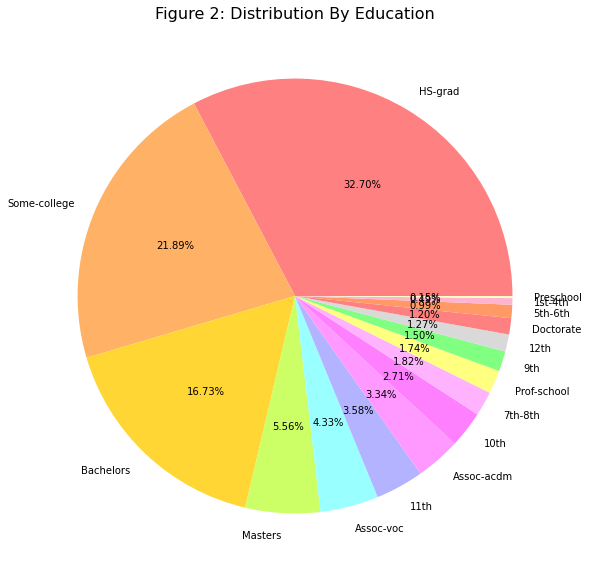

In [15]:
edu = pd.merge(pd.DataFrame(data.education.value_counts()),
               pd.DataFrame(data.education.value_counts(normalize=True)),
               left_index=True, right_index=True)
edu.rename(columns={"count":"Count", "proportion":"Proportion"}, inplace=True)

color_map = {
    '11th': '#FF8080',         # Light Red
    'HS-grad': '#FFB266',      # Orange
    'Assoc-acdm': '#FFD633',    # Yellow
    'Some-college': '#CCFF66',  # Light Green
    '10th': '#99FFFF',         # Cyan
    'Prof-school': '#B3B3FF',   # Light Blue
    '7th-8th': '#FF99FF',      # Magenta
    'Bachelors': '#FF80FF',     # Pink
    'Masters': '#FFB3FF',       # Light Pink
    '5th-6th': '#FFFF80',       # Light Yellow
    'Assoc-voc': '#80FF80',     # Light Green
    '9th': '#D9D9D9',           # Light Gray
    'Doctorate': '#FF8080',     # Light Red
    '12th': '#FF9966',          # Light Orange
    '1st-4th': '#FFB3D1',       # Light Pink
    'Preschool': '#FFFFCC'      # Pale Yellow
}
plt.figure(figsize=(10,10))
plt.pie(edu["Count"], labels = edu.index, autopct='%1.2f%%', colors=color_map.values())

plt.title(
    label="Figure 2: Distribution By Education", 
    fontdict={"fontsize":16}
)

Text(0, 0.5, 'Frequency')

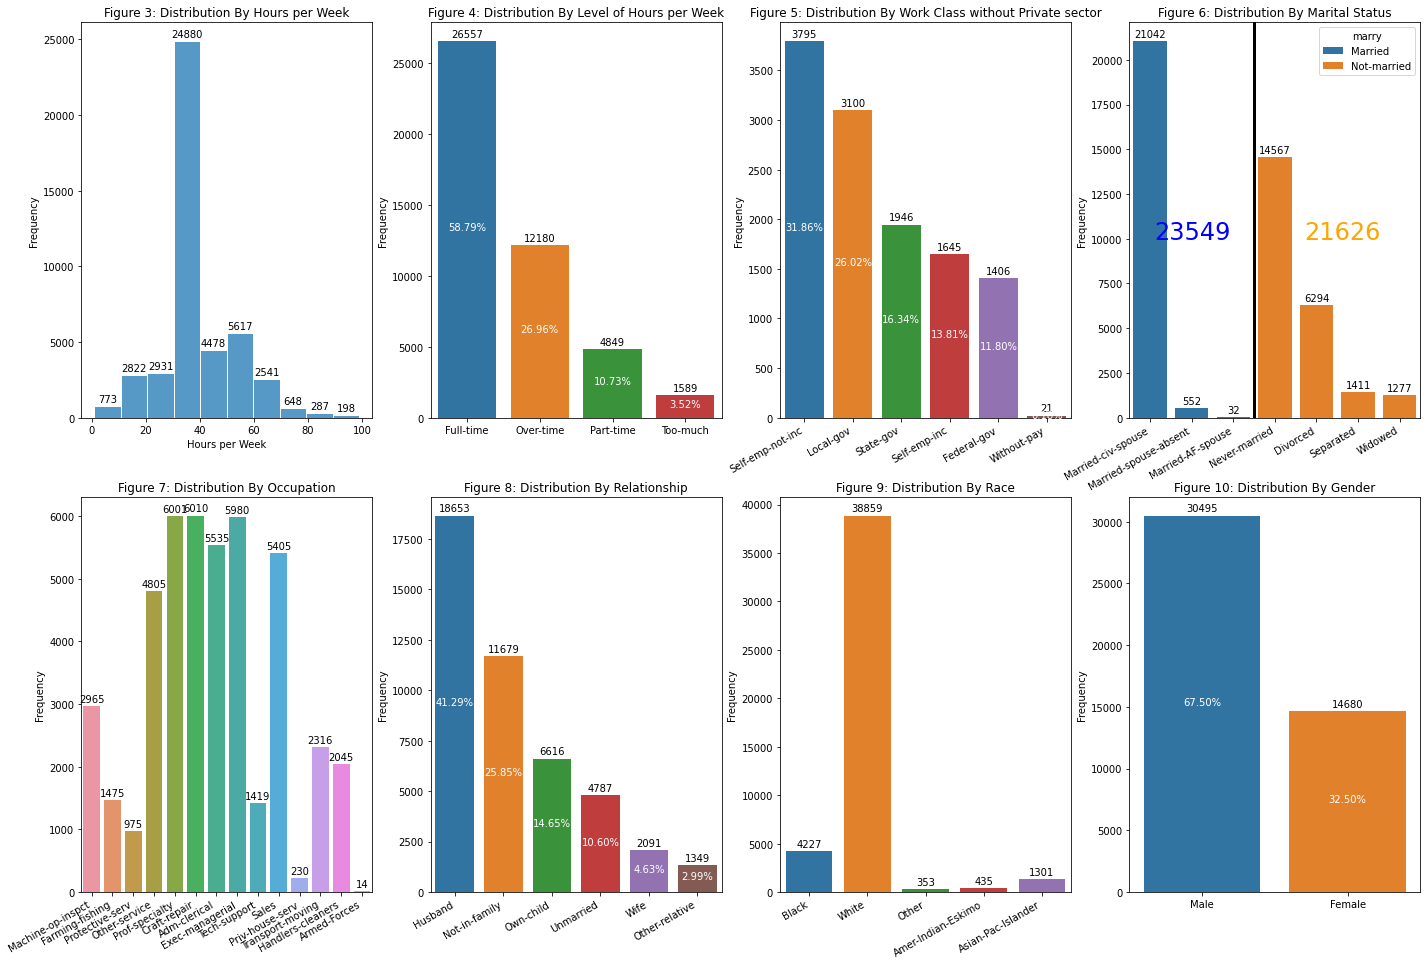

In [16]:
plt.subplots(nrows=2, ncols=4, figsize=(24,16))

# Figure 3
plt.subplot(2, 4, 1)
ax = sns.histplot(data=data, x="hours_per_week", bins=10, edgecolor = "white")
plt.title("Figure 3: Distribution By Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
ax.bar_label(container=ax.containers[0], padding=2)

# Figure 4
plt.subplot(2, 4, 2)
ax = sns.countplot(x=data.hours_work_level)
ax.bar_label(container=ax.containers[0], padding=2)
rel_values = data.hours_work_level.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.2f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls, padding=2, label_type='center', color='white')

ax.set_title("Figure 4: Distribution By Level of Hours per Week")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 5
plt.subplot(2, 4, 3)
ax = sns.countplot(x=data[data.workclass != "Private"].workclass,
                    order=data[data.workclass != "Private"].workclass.value_counts(ascending=False).index
)
ax.bar_label(container=ax.containers[0], padding=2)
rel_values = data[data.workclass != "Private"].workclass.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.2f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls, padding=2, label_type='center', color='white')

plt.xticks(rotation=30, ha="right")
ax.set_title("Figure 5: Distribution By Work Class without Private sector")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 6
plt.subplot(2, 4, 4)
ax = sns.barplot(x="marital_status", y="count", hue="marry", data=data.groupby(["marry"])["marital_status"].value_counts().reset_index(),
                dodge=False
)
ax.bar_label(container=ax.containers[0], padding=2)
ax.bar_label(container=ax.containers[1], padding=2)

plt.xticks(rotation=30, ha="right")
text_kwargs = dict(fontsize=24, color='blue')
plt.text(.1,10000, data.marry.value_counts()[0], **text_kwargs)
text_kwargs = dict(fontsize=24, color='orange')
plt.text(3.7,10000, data.marry.value_counts()[1], **text_kwargs)
plt.axvline(x=2.5, color="black", linewidth = 3)

ax.set_title("Figure 6: Distribution By Marital Status")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 7
plt.subplot(2, 4, 5)
ax = sns.countplot(x=data.occupation)
ax.bar_label(container=ax.containers[0], padding=2)
plt.xticks(rotation=30, ha="right")

ax.set_title("Figure 7: Distribution By Occupation")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 8
plt.subplot(2, 4, 6)
ax = sns.countplot(x=data.relationship, order=data.relationship.value_counts(normalize=True).index)
ax.bar_label(container=ax.containers[0], padding=2)
plt.xticks(rotation=30, ha="right")

rel_values = data.relationship.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.2f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls, padding=2, label_type='center', color='white')

ax.set_title("Figure 8: Distribution By Relationship")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 9
plt.subplot(2, 4, 7)
ax = sns.countplot(x=data.race)
ax.bar_label(container=ax.containers[0], padding=2)
plt.xticks(rotation=30, ha="right")

ax.set_title("Figure 9: Distribution By Race")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

# Figure 10
plt.subplot(2, 4, 8)
ax = sns.countplot(x=data.sex)
ax.bar_label(container=ax.containers[0], padding=2)

rel_values = data.sex.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.2f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls, padding=2, label_type='center', color='white')

ax.set_title("Figure 10: Distribution By Gender")
ax.set(xlabel=None)
ax.set_ylabel("Frequency")

In [17]:
wclass = pd.merge(pd.DataFrame(data.workclass.value_counts()),
               pd.DataFrame(data.workclass.value_counts(normalize=True)),
               left_index=True, right_index=True)
wclass.rename(columns={"count":"Count", "proportion":"Proportion"}, inplace=True)
wclass.Proportion = wclass.Proportion.map("{:.2%}".format)
wclass
# Private dominates the graph

,Count,Proportion
workclass,,
Private,33262,73.63%
Self-emp-not-inc,3795,8.40%
Local-gov,3100,6.86%
State-gov,1946,4.31%
Self-emp-inc,1645,3.64%
Federal-gov,1406,3.11%
Without-pay,21,0.05%


In [18]:
occ = pd.merge(pd.DataFrame(data.occupation.value_counts()),
               pd.DataFrame(data.occupation.value_counts(normalize=True)),
               left_index=True, right_index=True)
occ.rename(columns={"count":"Count", "proportion":"Proportion"}, inplace=True)
occ.Proportion = occ.Proportion.map("{:.2%}".format)
occ
# Attributes that exhibit a wide range of values and capture diverse patterns tend to provide more discriminatory power.

,Count,Proportion
occupation,,
Craft-repair,6010,13.30%
Prof-specialty,6001,13.28%
Exec-managerial,5980,13.24%
Adm-clerical,5535,12.25%
Sales,5405,11.96%
Other-service,4805,10.64%
Machine-op-inspct,2965,6.56%
Transport-moving,2316,5.13%
Handlers-cleaners,2045,4.53%


In [19]:
c = ["Low", "Medium-Low", "Medium-High", "High"]
gain_no_none = data.capital_gain_level.value_counts()[1:].to_frame().T
gain_no_none = gain_no_none[c].T
gain_no_none

,count
capital_gain_level,
Low,971
Medium-Low,1210
Medium-High,702
High,907


In [20]:
c = ["Low", "Medium-Low", "Medium-High", "High"]
loss_no_none = data.capital_loss_level.value_counts()[1:].to_frame().T
loss_no_none = loss_no_none[c].T
loss_no_none

,count
capital_loss_level,
Low,536
Medium-Low,547
Medium-High,571
High,486


Text(0, 0.5, 'capital_loss')

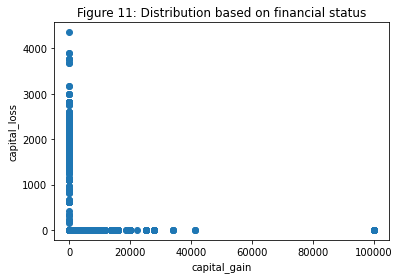

In [21]:
plt.scatter(data.capital_gain, data.capital_loss)
plt.title("Figure 11: Distribution based on financial status")
plt.xlabel("capital_gain")
plt.ylabel("capital_loss")

Text(0.5, 1.0, 'Figure 15: The level of people with negative financial status')

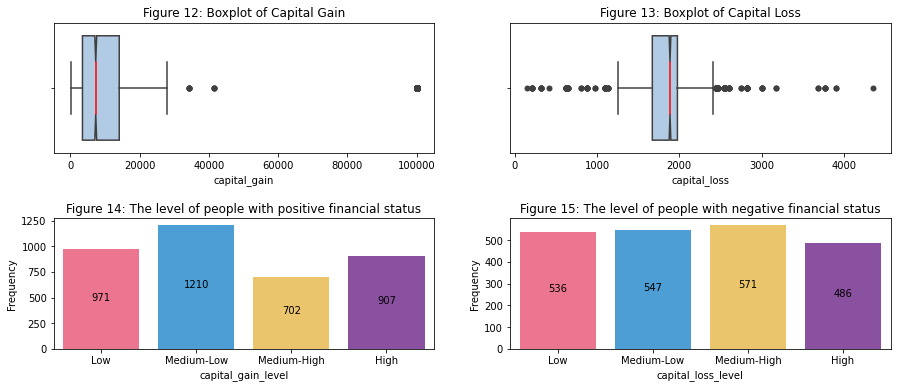

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
plt.subplots_adjust(hspace=0.5)
colors = ["#FF6384", "#36A2EB", "#FFCE56", "#8E44AD"]

# Figure 12
plt.subplot(2, 2, 1)
ax = sns.boxplot(x=data[data.capital_gain != 0].capital_gain,
            flierprops={"marker":'o'},
            notch=True,
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "red"}
)
plt.title("Figure 12: Boxplot of Capital Gain")

# Figure 13
plt.subplot(2, 2, 2)
ax = sns.boxplot(x=data[data.capital_loss != 0].capital_loss,
            flierprops={"marker":'o'},
            notch=True,
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "red"}
)
plt.title("Figure 13: Boxplot of Capital Loss")

# Figure 14
plt.subplot(2, 2, 3)
ax = sns.barplot(x=gain_no_none.index, y=gain_no_none["count"], palette=colors)
ax.bar_label(container=ax.containers[0], padding=2, label_type="center")
ax.set_ylabel("Frequency")
ax.set_title("Figure 14: The level of people with positive financial status")

# Figure 15
plt.subplot(2, 2, 4)
ax = sns.barplot(x=loss_no_none.index, y=loss_no_none["count"], palette=colors)
ax.bar_label(container=ax.containers[0], padding=2, label_type="center")
ax.set_ylabel("Frequency")
ax.set_title("Figure 15: The level of people with negative financial status")

---

[Text(0, 0, '11%'), Text(0, 0, '31%')]

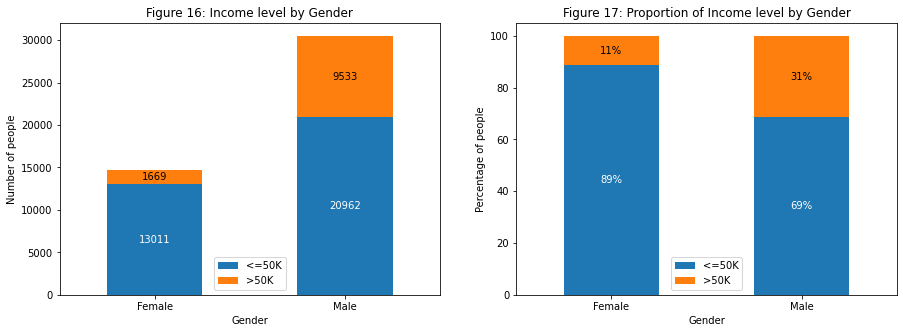

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# The dataset are male-dominant
pd.crosstab(data.sex, data.label).plot.bar(
    ax = axes[0],
    title = "Figure 16: Income level by Gender",
    ylabel = "Number of people",
    xlabel = "Gender",
    stacked=True,
    rot=0
).legend(loc='lower center')

axes[0].bar_label(axes[0].containers[0], label_type="center", color='w')
axes[0].bar_label(axes[0].containers[1], label_type="center", color='black')

# There are more male that makes above-average than female
pd.crosstab(data.sex, data.label).apply(lambda r: r/r.sum()*100, axis=1).plot.bar(
    ax = axes[1],
    title = "Figure 17: Proportion of Income level by Gender",
    ylabel = "Percentage of people",
    xlabel = "Gender",
    stacked=True,
    rot=0
).legend(loc='lower center')

axes[1].bar_label(axes[1].containers[0], label_type="center", color='w', fmt='%.2g%%')
axes[1].bar_label(axes[1].containers[1], label_type="center", color='black', fmt='%.2g%%')

In [24]:
agelevel_count = pd.crosstab(data.label, data.age_level, margins=True)
agelevel_perc = pd.crosstab(data.label, data.age_level, margins=True, normalize=True).applymap("{:.2%}".format)
agelevel_perc.rename(columns={"Middle-aged":"% Middle-aged", "Old":"% Old", "Senior":"% Senior", "Young":"% Young", "All":"% All"}, inplace=True)
pd.merge(agelevel_count, agelevel_perc, left_index=True, right_index=True).T

label,<=50K,>50K,All
age_level,,,
Middle-aged,17204,6326,23530
Old,1051,292,1343
Senior,7465,4421,11886
Young,8253,163,8416
All,33973,11202,45175
% Middle-aged,38.08%,14.00%,52.09%
% Old,2.33%,0.65%,2.97%
% Senior,16.52%,9.79%,26.31%
% Young,18.27%,0.36%,18.63%


In [25]:
hourslevel_count = pd.crosstab(data.label, data.hours_work_level, margins=True)
hourslevel_perc = pd.crosstab(data.label, data.hours_work_level, margins=True, normalize=True).applymap("{:.2%}".format)
hourslevel_perc.rename(columns={"Full-time":"% Full-time", "Over-time":"% Over-time", "Part-time":"% Part-time", "Too-much":"% Too-much", "All":"% All"}, inplace=True)
pd.merge(hourslevel_count, hourslevel_perc, left_index=True, right_index=True).T

label,<=50K,>50K,All
hours_work_level,,,
Full-time,21236,5321,26557
Over-time,7194,4986,12180
Part-time,4535,314,4849
Too-much,1008,581,1589
All,33973,11202,45175
% Full-time,47.01%,11.78%,58.79%
% Over-time,15.92%,11.04%,26.96%
% Part-time,10.04%,0.70%,10.73%
% Too-much,2.23%,1.29%,3.52%


In [26]:
pd.crosstab(data.label, data.workclass, margins=True)

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
label,,,,,,,,
<=50K,857,2185,26017,733,2736,1426,19,33973
>50K,549,915,7245,912,1059,520,2,11202
All,1406,3100,33262,1645,3795,1946,21,45175


[Text(0, 0, '39%'),
 Text(0, 0, '30%'),
 Text(0, 0, '22%'),
 Text(0, 0, '55%'),
 Text(0, 0, '28%'),
 Text(0, 0, '27%'),
 Text(0, 0, '9.5%')]

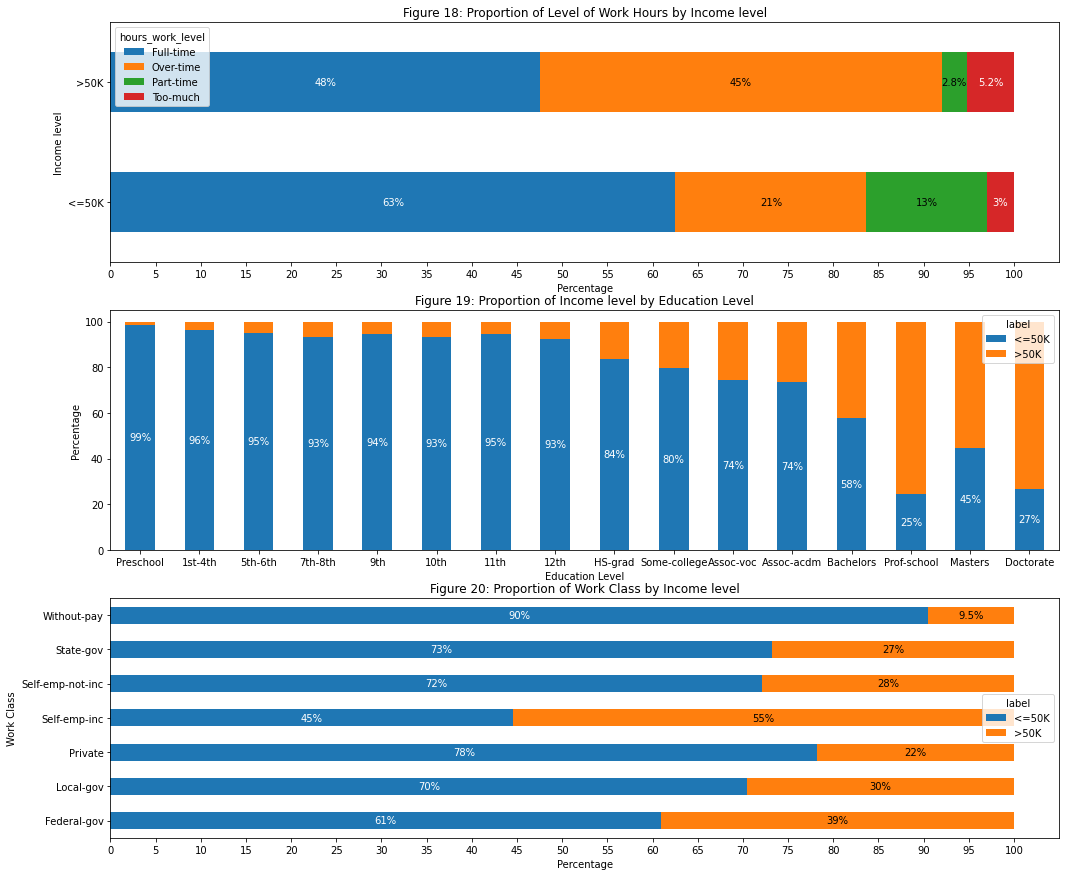

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(17,15))
plt.subplots_adjust(hspace=0.2)

# over time and too much have the most people in making above average
pd.crosstab(data.hours_work_level, data.label).T.apply(lambda r: r/r.sum()*100, axis=1).plot.barh(
    ax = axes[0],
    title = "Figure 18: Proportion of Level of Work Hours by Income level",
    ylabel = "Income level",
    xlabel = "Percentage",
    stacked=True, rot=0
)
axes[0].xaxis.set_ticks(np.arange(0, 101, 5))
axes[0].bar_label(axes[0].containers[0], label_type="center", color='w', fmt='%.2g%%')
axes[0].bar_label(axes[0].containers[1], label_type="center", color='black', fmt='%.2g%%')
axes[0].bar_label(axes[0].containers[2], label_type="center", color='black', fmt='%.2g%%')
axes[0].bar_label(axes[0].containers[3], label_type="center", color='w', fmt='%.2g%%')

c = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", 
     "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Prof-school", "Masters", "Doctorate"]
tem = pd.crosstab(data.label, data.education)
tem = tem[c]
tem.T.apply(lambda r: r/r.sum()*100, axis=1).plot.bar(
    ax = axes[1],
    title = "Figure 19: Proportion of Income level by Education Level",
    ylabel = "Percentage",
    xlabel = "Education Level",
    stacked=True, rot=0
)
axes[1].bar_label(axes[1].containers[0], label_type="center", color='w', fmt='%.2g%%')

pd.crosstab(data.workclass, data.label).apply(lambda r: r/r.sum()*100, axis=1).plot.barh(
    ax = axes[2],
    title = "Figure 20: Proportion of Work Class by Income level",
    ylabel = "Work Class",
    xlabel = "Percentage",
    stacked=True, rot=0
)
axes[2].xaxis.set_ticks(np.arange(0, 101, 5))
axes[2].bar_label(axes[2].containers[0], label_type="center", color='w', fmt='%.2g%%')
axes[2].bar_label(axes[2].containers[1], label_type="center", color='black', fmt='%.2g%%')

[Text(0.5, 73.50000000000009, ''), Text(946.764705882353, 0.5, '')]

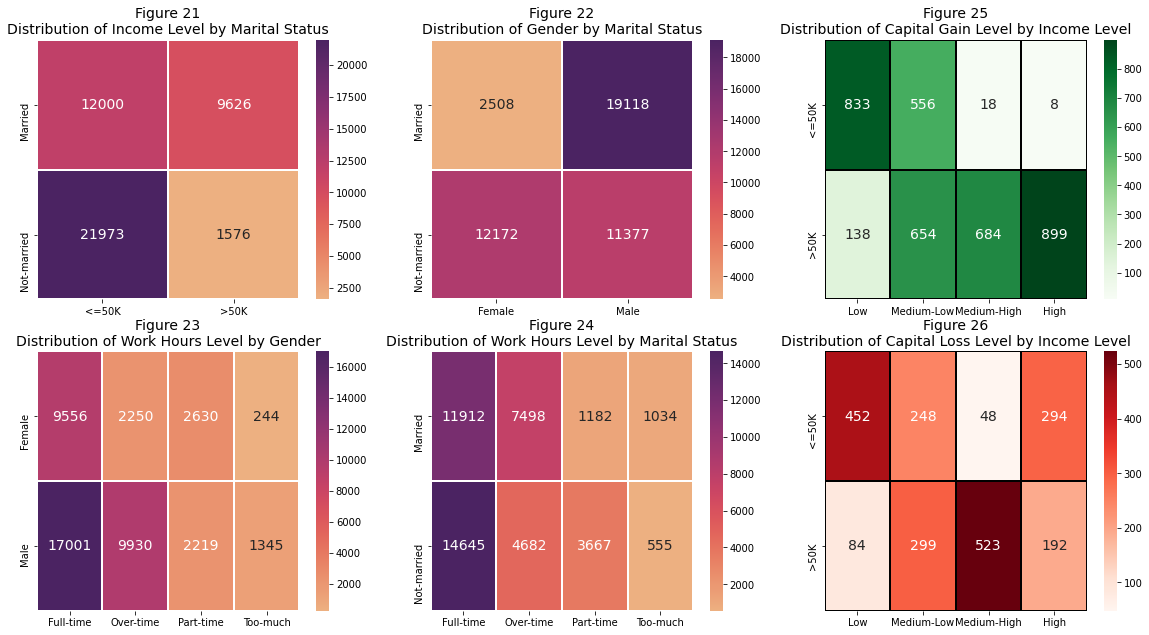

In [28]:
fig = plt.figure(figsize=(20,10.5))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

sns.heatmap(pd.crosstab(data.marry, data.label), ax = ax1, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="flare", linewidths=2)
ax1.set_title('Figure 21\nDistribution of Income Level by Marital Status', fontdict={"fontsize":14})
ax1.set(xlabel=None, ylabel=None)

sns.heatmap(pd.crosstab(data.marry, data.sex), ax = ax2, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="flare", linewidths=2)
ax2.set_title('Figure 22\nDistribution of Gender by Marital Status', fontdict={"fontsize":14})
ax2.set(xlabel=None, ylabel=None)

sns.heatmap(pd.crosstab(data.sex, data.hours_work_level), ax = ax4, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="flare", linewidths=2)
ax4.set_title('Figure 23\nDistribution of Work Hours Level by Gender', fontdict={"fontsize":14})
ax4.set(xlabel=None, ylabel=None)

sns.heatmap(pd.crosstab(data.marry, data.hours_work_level), ax = ax5, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="flare", linewidths=2)
ax5.set_title('Figure 24\nDistribution of Work Hours Level by Marital Status', fontdict={"fontsize":14})
ax5.set(xlabel=None, ylabel=None)

c = ["Low", "Medium-Low", "Medium-High", "High"]
tem = pd.crosstab(data.capital_gain_level, data.label)[:-1].T
tem = tem[c]
sns.heatmap(tem, ax = ax3, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="Greens", linewidths=2, linecolor="black")
ax3.set_title('Figure 25\nDistribution of Capital Gain Level by Income Level', fontdict={"fontsize":14})
ax3.set(xlabel=None, ylabel=None)

c = ["Low", "Medium-Low", "Medium-High", "High"]
tem = pd.crosstab(data.capital_loss_level, data.label)[:-1].T
tem = tem[c]
sns.heatmap(tem, ax = ax6, annot=True, fmt="d", annot_kws={"fontsize":14}, cmap="Reds", linewidths=2, linecolor="black")
ax6.set_title('Figure 26\nDistribution of Capital Loss Level by Income Level', fontdict={"fontsize":14})
ax6.set(xlabel=None, ylabel=None)

---

What is the demographic profile of individuals earning above a certain income threshold?
It can be in age, gender, education level, marital status, occupation, income, or ethnicity.

In [29]:
high_inc = data[data.label == ">50K"]
high_inc.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label,age_level,hours_work_level,capital_gain_level,capital_loss_level,marry
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Middle-aged,Full-time,None,None,Married
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Middle-aged,Full-time,Medium-High,None,Married
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,Senior,Full-time,Low,None,Married
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,Senior,Full-time,Medium-Low,None,Married
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,Senior,Over-time,Low,None,Married


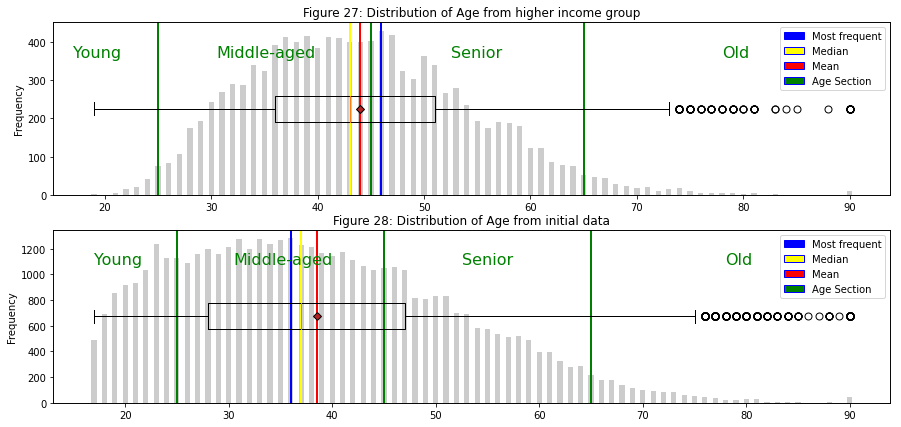

In [30]:
age_count_aboveavg = high_inc.age.value_counts().reset_index()
age_count_aboveavg.rename(columns={"age":"Age", "count":"Count"}, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(15, 7))
# Drawing the bar chart
ax[0].bar(age_count_aboveavg["Age"], age_count_aboveavg["Count"], width=0.5, color=(0, 0, 0, 0.2))
# Drawing the box plot above the chart. Using ax.twinx means the two share the same x axis.
ax2 = ax[0].twinx()
ax2.boxplot(high_inc.age, vert=False, showmeans=True,
            meanprops={"marker":'D', "markeredgecolor":'black', "markerfacecolor":"firebrick"},
            flierprops={"marker":'o', "markersize":7, "linestyle":'none'}
)
ax[0].set_title("Figure 27: Distribution of Age from higher income group")
ax[0].set_ylabel("Frequency")

# Hide the second y axis as it is not needed
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

# Drawing central tendency measures
ax[0].axvline(high_inc.age.mean(), color='red', linewidth=2)
ax[0].axvline(high_inc.age.mode()[0], color='blue', linewidth=2)
ax[0].axvline(high_inc.age.median(), color='yellow', linewidth=2)

# Drawing age's seperation
ax[0].axvline(25, color='green', linewidth=2)
ax[0].axvline(45, color='green', linewidth=2)
ax[0].axvline(65, color='green', linewidth=2)

# Texts
text_kwargs = dict(fontsize=16, color='green')
plt.text(17,1.3, 'Young', **text_kwargs)
plt.text(30.5,1.3, 'Middle-aged', **text_kwargs)
plt.text(52.5,1.3, 'Senior', **text_kwargs)
plt.text(78,1.3, 'Old', **text_kwargs)

# And legends
legend_elements = [Patch(facecolor='blue', edgecolor='b', label='Most frequent'),
                   Patch(facecolor='yellow', edgecolor='b', label='Median'),
                   Patch(facecolor='red', edgecolor='b', label='Mean'),
                   Patch(facecolor='green', edgecolor='b', label='Age Section')
]
ax[0].legend(handles=legend_elements)



# Drawing the bar chart
ax[1].bar(age_count_all["Age"], age_count_all["Count"], width=0.5, color=(0, 0, 0, 0.2))
# Drawing the box plot above the chart. Using ax.twinx means the two share the same x axis.
ax2 = ax[1].twinx()
ax2.boxplot(data.age, vert=False, showmeans=True,
            meanprops={"marker":'D', "markeredgecolor":'black', "markerfacecolor":"firebrick"},
            flierprops={"marker":'o', "markersize":7, "linestyle":'none'}
)
ax[1].set_title("Figure 28: Distribution of Age from initial data")
ax[1].set_ylabel("Frequency")

# Hide the second y axis as it is not needed
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)

# Drawing central tendency measures
ax[1].axvline(data.age.mean(), color='red', linewidth=2)
ax[1].axvline(data.age.mode()[0], color='blue', linewidth=2)
ax[1].axvline(data.age.median(), color='yellow', linewidth=2)

# Drawing age's seperation
ax[1].axvline(25, color='green', linewidth=2)
ax[1].axvline(45, color='green', linewidth=2)
ax[1].axvline(65, color='green', linewidth=2)

# Texts
text_kwargs = dict(fontsize=16, color='green')
plt.text(17,1.3, 'Young', **text_kwargs)
plt.text(30.5,1.3, 'Middle-aged', **text_kwargs)
plt.text(52.5,1.3, 'Senior', **text_kwargs)
plt.text(78,1.3, 'Old', **text_kwargs)

# And legends
legend_elements = [Patch(facecolor='blue', edgecolor='b', label='Most frequent'),
                   Patch(facecolor='yellow', edgecolor='b', label='Median'),
                   Patch(facecolor='red', edgecolor='b', label='Mean'),
                   Patch(facecolor='green', edgecolor='b', label='Age Section')
]
ax[1].legend(handles=legend_elements)

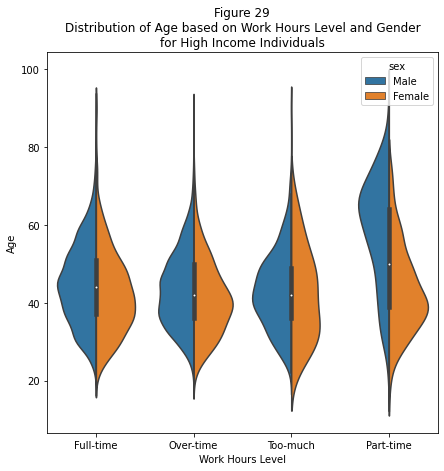

In [31]:
sns.violinplot(y ="age", x ="hours_work_level", hue="sex", split=True, data = high_inc)
plt.title("Figure 29\nDistribution of Age based on Work Hours Level and Gender\nfor High Income Individuals")
plt.xlabel("Work Hours Level")
plt.ylabel("Age")

fig = plt.gcf()
fig.set_figwidth(7)
fig.set_figheight(7)

plt.show()

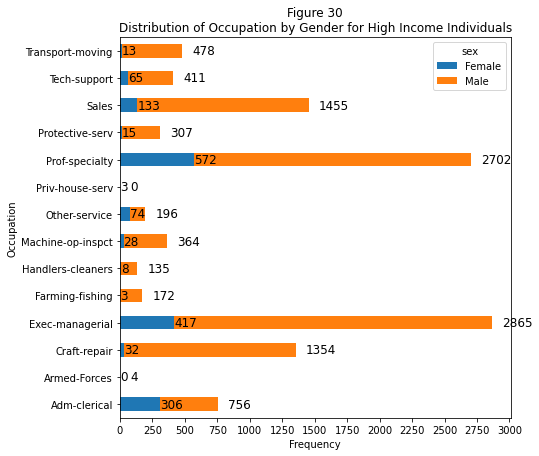

In [32]:
ax = pd.crosstab(high_inc.occupation, high_inc.sex).plot(kind='barh', stacked=True,
    title ="Figure 30\nDistribution of Occupation by Gender for High Income Individuals",
    xlabel="Frequency",
    ylabel="Occupation"
)
plt.xticks(np.arange(0,3001,250))
ax.bar_label(ax.containers[0], label_type="edge", color='black', fontsize=12)
ax.bar_label(ax.containers[1], label_type="edge", color='black', padding=10, fontsize=12)
# padding to not let the low values overlap

fig = plt.gcf()
fig.set_figwidth(7)
fig.set_figheight(7)

plt.show()

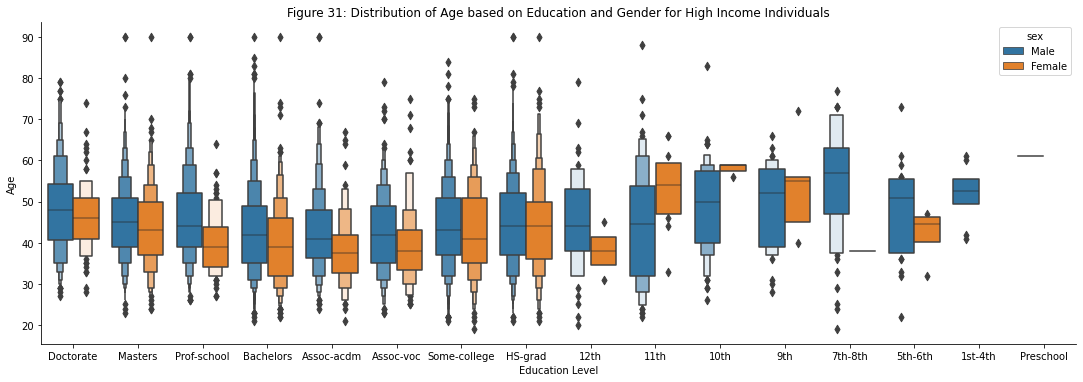

In [33]:
c = ['Doctorate', 'Masters', 'Prof-school', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'HS-grad',
     '12th', '11th', '10th', '9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool']
sns.catplot(y ="age", x ="education", hue="sex", kind ="boxen", data = high_inc, order=c, legend_out=False)
plt.title("Figure 31: Distribution of Age based on Education and Gender for High Income Individuals")
plt.xlabel("Education Level")
plt.ylabel("Age")

fig = plt.gcf()
fig.set_figwidth(17)
fig.set_figheight(5)

plt.show()
# It is not possible to modify the spacing between individual boxes
# This is not possible with seaborn because it does not provide any means of modifying the positions keyword, sadly.

---

In [34]:
# For Data Modelling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
# Dropping categorical education since there are an education_num column that represent the same thing
data = data.drop('education', axis=1)

# Dropping label column from the dataset to accomodate target variable
label = data.label
data.drop(columns=["label"], inplace=True)
label = label.replace("<=50K", 0)
label = label.replace(">50K", 1)
label.value_counts()

label
0    33973
1    11202
Name: count, dtype: int64

---

In [36]:
# Normalization
scaler = StandardScaler()
numerical = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
data[numerical] = scaler.fit_transform(data[numerical])

# Preprocess categorical features using One Hot Encoding
data = pd.get_dummies(data)

# Splitting training and testing dataset in three suite
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(data, label, test_size=.5, random_state=1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(data, label, test_size=.4, random_state=1)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(data, label, test_size=.2, random_state=1)

---

- Decision Tree & Random Forest will be used.
- For each suite, the algorithm will be run twice, without parameter and with parameter.
    - The parameter tuning will be done using GridSearchCV, which is a tool for finding the optimal parameter values from a set of given parameters.

In [37]:
# Makes predictions that ignore the input features.
# This classifier serves as a simple baseline to compare against other classifiers.
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(xtrain1, ytrain1)
dummy1 = dummy.score(xtest1,ytest1)
dummy.fit(xtrain2, ytrain2)
dummy2 = dummy.score(xtest2,ytest2)
dummy.fit(xtrain3, ytrain3)
dummy3 = dummy.score(xtest3,ytest3)

print(dummy1, dummy2, dummy3)

0.7543828581547725 0.7549529607083564 0.7534034311012728


### Decision Tree

In [38]:
dt1_vanilla = DecisionTreeClassifier(random_state=1).fit(xtrain1, ytrain1)
ypred1 = dt1_vanilla.predict(xtest1)
dt1_train_score_vanilla = dt1_vanilla.score(xtrain1, ytrain1)
dt1_test_score_vanilla = accuracy_score(ytest1, ypred1)
print("Training set score:", dt1_train_score_vanilla, "\nTest set score:", dt1_test_score_vanilla)
print("Confusion matrix:\n", confusion_matrix(ytest1, ypred1))
print("Classification report:\n", classification_report(ytest1,ypred1))

Training set score: 0.9999114534909461 
Test set score: 0.81379493536391
Confusion matrix:
 [[14841  2199]
 [ 2007  3541]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     17040
           1       0.62      0.64      0.63      5548

    accuracy                           0.81     22588
   macro avg       0.75      0.75      0.75     22588
weighted avg       0.82      0.81      0.81     22588



In [39]:
dt1 = DecisionTreeClassifier(random_state = 1).fit(xtrain1, ytrain1)
param = {
    "max_depth" : [5,6,7,8,9,10,11,12],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : [2,4,6,8,10]
}
grid_dt1 = GridSearchCV(dt1, param).fit(xtrain1, ytrain1)
best_params = grid_dt1.best_params_
print(best_params)

dt1 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain1, ytrain1)
ypred1 = dt1.predict(xtest1)
dt1_train_score = dt1.score(xtrain1, ytrain1)
dt1_test_score = accuracy_score(ytest1, ypred1)
print("Training set score:", dt1_train_score, "\nTest set score:", dt1_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest1, ypred1))
print("Classification report:\n", classification_report(ytest1,ypred1))

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training set score: 0.8539425333156241 
Test set score: 0.8527979458119356
Confusion matrix:
 [[16305   735]
 [ 2590  2958]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     17040
           1       0.80      0.53      0.64      5548

    accuracy                           0.85     22588
   macro avg       0.83      0.75      0.77     22588
weighted avg       0.85      0.85      0.84     22588



In [40]:
dt2_vanilla = DecisionTreeClassifier(random_state=1).fit(xtrain2, ytrain2)
ypred2 = dt2_vanilla.predict(xtest2)
dt2_train_score_vanilla = dt2_vanilla.score(xtrain2, ytrain2)
dt2_test_score_vanilla = accuracy_score(ytest2, ypred2)
print("Training set score:", dt2_train_score_vanilla, "\nTest set score:", dt2_test_score_vanilla)
print("Confusion matrix:\n", confusion_matrix(ytest2, ypred2))
print("Classification report:\n", classification_report(ytest2,ypred2))

Training set score: 0.9998893193137798 
Test set score: 0.8092971776425014
Confusion matrix:
 [[11829  1813]
 [ 1633  2795]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     13642
           1       0.61      0.63      0.62      4428

    accuracy                           0.81     18070
   macro avg       0.74      0.75      0.75     18070
weighted avg       0.81      0.81      0.81     18070



In [41]:
dt2 = DecisionTreeClassifier(random_state = 1).fit(xtrain2, ytrain2)
param = {
    "max_depth" : [7,8,9,10,11,12],
    "min_samples_leaf" : [7,8,9,10,11,12],
    "min_samples_split" : [2,4,6,8]
}
grid_dt2 = GridSearchCV(dt2, param).fit(xtrain2, ytrain2)
best_params = grid_dt2.best_params_
print(best_params)

dt2 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain2, ytrain2)
ypred2 = dt2.predict(xtest2)
dt2_train_score = dt2.score(xtrain2, ytrain2)
dt2_test_score = accuracy_score(ytest2, ypred2)
print("Training set score:", dt2_train_score, "\nTest set score:", dt2_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest2, ypred2))
print("Classification report:\n", classification_report(ytest2,ypred2))

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Training set score: 0.8610588452315071 
Test set score: 0.8551189817376867
Confusion matrix:
 [[12900   742]
 [ 1876  2552]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     13642
           1       0.77      0.58      0.66      4428

    accuracy                           0.86     18070
   macro avg       0.82      0.76      0.78     18070
weighted avg       0.85      0.86      0.85     18070



In [42]:
dt3_vanilla = DecisionTreeClassifier(random_state=1).fit(xtrain3, ytrain3)
ypred3 = dt3_vanilla.predict(xtest3)
dt3_train_score_vanilla = dt3_vanilla.score(xtrain3, ytrain3)
dt3_test_score_vanilla = accuracy_score(ytest3, ypred3)
print("Training set score:", dt3_train_score_vanilla, "\nTest set score:", dt3_test_score_vanilla)
print("Confusion matrix:\n", confusion_matrix(ytest3, ypred3))
print("Classification report:\n", classification_report(ytest3,ypred3))

Training set score: 0.9998893193137798 
Test set score: 0.8097399003873824
Confusion matrix:
 [[5893  914]
 [ 805 1423]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      6807
           1       0.61      0.64      0.62      2228

    accuracy                           0.81      9035
   macro avg       0.74      0.75      0.75      9035
weighted avg       0.81      0.81      0.81      9035



In [43]:
dt3 = DecisionTreeClassifier(random_state = 1).fit(xtrain3, ytrain3)
param = {
    "max_depth" : [7,8,9,10,11,12],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : [2,4,6,8,10]
}
grid_dt3 = GridSearchCV(dt3, param).fit(xtrain3, ytrain3)
best_params = grid_dt3.best_params_
print(best_params)

dt3 = DecisionTreeClassifier(random_state=1, **best_params).fit(xtrain3, ytrain3)
ypred3 = dt1.predict(xtest3)
dt3_train_score = dt3.score(xtrain3, ytrain3)
dt3_test_score = accuracy_score(ytest3, ypred3)
print("Training set score:", dt3_train_score, "\nTest set score:", dt3_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest3, ypred3))
print("Classification report:\n", classification_report(ytest3,ypred3))

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Training set score: 0.8648312119535141 
Test set score: 0.8541228555617045
Confusion matrix:
 [[6518  289]
 [1029 1199]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6807
           1       0.81      0.54      0.65      2228

    accuracy                           0.85      9035
   macro avg       0.83      0.75      0.78      9035
weighted avg       0.85      0.85      0.84      9035



### Random Forest

In [44]:
forest1_vanilla = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain1,ytrain1)
ypred1_forest = forest1_vanilla.predict(xtest1)
forest1_train_score_vanilla = forest1_vanilla.score(xtrain1, ytrain1)
forest1_test_score_vanila = accuracy_score(ytest1, ypred1_forest)
print("Training set score:", forest1_train_score_vanilla, "\nTest set score:", forest1_test_score_vanila)
print("Confusion matrix:\n", confusion_matrix(ytest1, ypred1_forest))
print("Classification report:\n", classification_report(ytest1,ypred1_forest))

Training set score: 0.9996015407092576 
Test set score: 0.8524437754559944
Confusion matrix:
 [[15783  1257]
 [ 2076  3472]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     17040
           1       0.73      0.63      0.68      5548

    accuracy                           0.85     22588
   macro avg       0.81      0.78      0.79     22588
weighted avg       0.85      0.85      0.85     22588



In [45]:
forest1 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain1, ytrain1)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid_forest1 = GridSearchCV(forest1, param).fit(xtrain1, ytrain1)
best_params = grid_forest1.best_params_
print(best_params)

forest1 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain1, ytrain1)
ypred1_forest = forest1.predict(xtest1)
forest1_train_score = forest1.score(xtrain1, ytrain1)
forest1_test_score = accuracy_score(ytest1, ypred1)
print("Training set score:", forest1_train_score, "\nTest set score:", forest1_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest1, ypred1))
print("Classification report:\n", classification_report(ytest1,ypred1))

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 12}
Training set score: 0.8837827068667817 
Test set score: 0.8527979458119356
Confusion matrix:
 [[16305   735]
 [ 2590  2958]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     17040
           1       0.80      0.53      0.64      5548

    accuracy                           0.85     22588
   macro avg       0.83      0.75      0.77     22588
weighted avg       0.85      0.85      0.84     22588



In [46]:
forest2_vanilla = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain2,ytrain2)
ypred2_forest = forest2_vanilla.predict(xtest2)
forest2_train_score_vanilla = forest2_vanilla.score(xtrain2, ytrain2)
forest2_test_score_vanila = accuracy_score(ytest2, ypred2_forest)
print("Training set score:", forest2_train_score_vanilla, "\nTest set score:", forest2_test_score_vanila)
print("Confusion matrix:\n", confusion_matrix(ytest2, ypred2_forest))
print("Classification report:\n", classification_report(ytest2,ypred2_forest))

Training set score: 0.999557277255119 
Test set score: 0.8480354178195905
Confusion matrix:
 [[12590  1052]
 [ 1694  2734]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     13642
           1       0.72      0.62      0.67      4428

    accuracy                           0.85     18070
   macro avg       0.80      0.77      0.78     18070
weighted avg       0.84      0.85      0.84     18070



In [47]:
forest2 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain2, ytrain2)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid_forest2 = GridSearchCV(forest1, param).fit(xtrain2, ytrain2)
best_params = grid_forest2.best_params_
print(best_params)

forest2 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain2, ytrain2)
ypred2_forest = forest2.predict(xtest2)
forest2_train_score = forest2.score(xtrain2, ytrain2)
forest2_test_score = accuracy_score(ytest2, ypred2)
print("Training set score:", forest2_train_score, "\nTest set score:", forest2_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest2, ypred2))
print("Classification report:\n", classification_report(ytest2,ypred2))

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}
Training set score: 0.8837114923445859 
Test set score: 0.8551189817376867
Confusion matrix:
 [[12900   742]
 [ 1876  2552]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     13642
           1       0.77      0.58      0.66      4428

    accuracy                           0.86     18070
   macro avg       0.82      0.76      0.78     18070
weighted avg       0.85      0.86      0.85     18070



In [48]:
forest3_vanilla = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain3,ytrain3)
ypred3_forest = forest3_vanilla.predict(xtest3)
forest3_train_score_vanilla = forest3_vanilla.score(xtrain3, ytrain3)
forest3_test_score_vanila = accuracy_score(ytest3, ypred3_forest)
print("Training set score:", forest3_train_score_vanilla, "\nTest set score:", forest3_test_score_vanila)
print("Confusion matrix:\n", confusion_matrix(ytest3, ypred3_forest))
print("Classification report:\n", classification_report(ytest3,ypred3_forest))

Training set score: 0.999557277255119 
Test set score: 0.8516878804648589
Confusion matrix:
 [[6301  506]
 [ 834 1394]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6807
           1       0.73      0.63      0.68      2228

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035



In [49]:
forest3 = RandomForestClassifier(n_estimators=50, random_state=1).fit(xtrain3, ytrain3)
param = {
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
grid_forest3 = GridSearchCV(forest3, param).fit(xtrain3, ytrain3)
best_params = grid_forest3.best_params_
print(best_params)

forest3 = RandomForestClassifier(n_estimators=50, random_state=1, **best_params).fit(xtrain3, ytrain3)
ypred3_forest = forest3.predict(xtest3)
forest3_train_score = forest3.score(xtrain3, ytrain3)
forest3_test_score = accuracy_score(ytest3, ypred3)
print("Training set score:", forest3_train_score, "\nTest set score:", forest3_test_score)
print("Confusion matrix:\n", confusion_matrix(ytest3, ypred3))
print("Classification report:\n", classification_report(ytest3,ypred3))

{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 12}
Training set score: 0.8831765356945213 
Test set score: 0.8541228555617045
Confusion matrix:
 [[6518  289]
 [1029 1199]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6807
           1       0.81      0.54      0.65      2228

    accuracy                           0.85      9035
   macro avg       0.83      0.75      0.78      9035
weighted avg       0.85      0.85      0.84      9035



---

([<matplotlib.axis.YTick at 0x14520c9ef40>,
 [Text(0, 0.5, 'Suite1'), Text(0, 1.5, 'Suite2'), Text(0, 2.5, 'Suite3')])

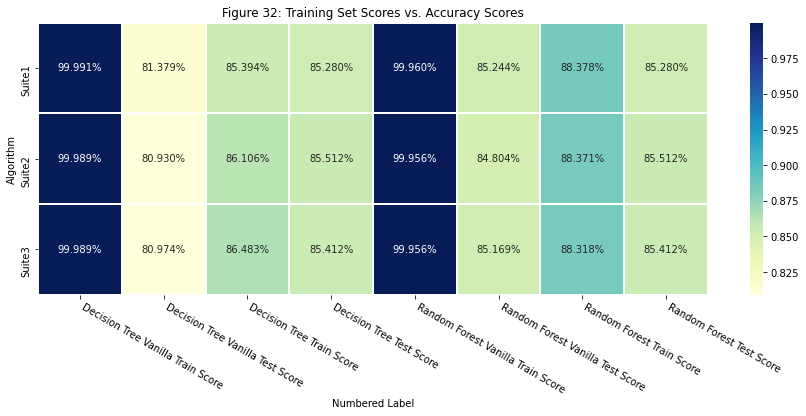

In [50]:
scores = [
    [dt1_train_score_vanilla, dt1_test_score_vanilla, dt1_train_score, dt1_test_score, forest1_train_score_vanilla, forest1_test_score_vanila, forest1_train_score, forest1_test_score],
    [dt2_train_score_vanilla, dt2_test_score_vanilla, dt2_train_score, dt2_test_score, forest2_train_score_vanilla, forest2_test_score_vanila, forest2_train_score, forest2_test_score],
    [dt3_train_score_vanilla, dt3_test_score_vanilla, dt3_train_score, dt3_test_score, forest3_train_score_vanilla, forest3_test_score_vanila, forest3_train_score, forest3_test_score]
]

plt.figure(figsize=(15, 5))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3%', linecolor="w", linewidth=.2)
plt.xlabel('Numbered Label')
plt.ylabel('Algorithm')
plt.title('Figure 32: Training Set Scores vs. Accuracy Scores')
plt.xticks(np.arange(8) + 0.5,
           ['Decision Tree Vanilla Train Score', 'Decision Tree Vanilla Test Score', 'Decision Tree Train Score', 'Decision Tree Test Score',
            'Random Forest Vanilla Train Score', 'Random Forest Vanilla Test Score', 'Random Forest Train Score', 'Random Forest Test Score'],
            rotation=-30, ha="left")
plt.yticks(np.arange(3) + 0.5, ['Suite1', 'Suite2', 'Suite3'])

([<matplotlib.axis.YTick at 0x14515a5dfa0>,
 [Text(0, 0.5, 'Decision Tree'), Text(0, 1.5, 'Random Forest')])

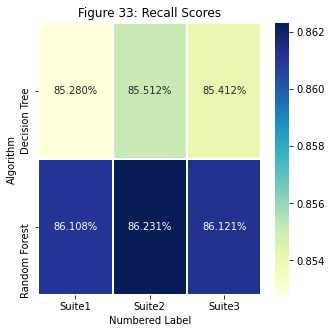

In [51]:
recall=[
    [recall_score(ytest1, ypred1, average="weighted"),
    recall_score(ytest2, ypred2, average="weighted"),
    recall_score(ytest3, ypred3, average="weighted")],
    [recall_score(ytest1, ypred1_forest, average="weighted"),
    recall_score(ytest2, ypred2_forest, average="weighted"),
    recall_score(ytest3, ypred3_forest, average="weighted")]
]
plt.figure(figsize=(5, 5))
sns.heatmap(recall, annot=True, cmap='YlGnBu', fmt='.3%', linecolor="w", linewidth=.2)
plt.xlabel('Numbered Label')
plt.ylabel('Algorithm')
plt.title('Figure 33: Recall Scores')
plt.xticks(np.arange(3) + 0.5, ["Suite1", "Suite2", "Suite3"])
plt.yticks(np.arange(2) + 0.5, ['Decision Tree', 'Random Forest'])

([<matplotlib.axis.YTick at 0x145207b4c70>,
 [Text(0, 0.5, 'Decision Tree'), Text(0, 1.5, 'Random Forest')])

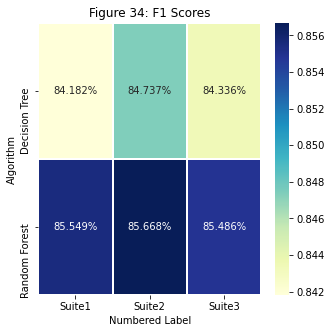

In [52]:
f1=[
    [f1_score(ytest1, ypred1, average="weighted"),
    f1_score(ytest2, ypred2, average="weighted"),
    f1_score(ytest3, ypred3, average="weighted")],
    [f1_score(ytest1, ypred1_forest, average="weighted"),
    f1_score(ytest2, ypred2_forest, average="weighted"),
    f1_score(ytest3, ypred3_forest, average="weighted")]
]
plt.figure(figsize=(5, 5))
sns.heatmap(f1, annot=True, cmap='YlGnBu', fmt='.3%', linecolor="w", linewidth=.2)
plt.xlabel('Numbered Label')
plt.ylabel('Algorithm')
plt.title('Figure 34: F1 Scores')
plt.xticks(np.arange(3) + 0.5, ["Suite1", "Suite2", "Suite3"])
plt.yticks(np.arange(2) + 0.5, ['Decision Tree', 'Random Forest'])